In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats

import statsmodels.api as sma
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import linear_rainbow

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,mean_absolute_percentage_error

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read The dataset

data = pd.read_excel('Concrete_Data.xls')

In [4]:
data.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_agg,fine_agg,age,comp_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


### Descriptive Statistics

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cement              1030 non-null   float64
 1   blast_furnace_slag  1030 non-null   float64
 2   fly_ash             1030 non-null   float64
 3   water               1030 non-null   float64
 4   superplasticizer    1030 non-null   float64
 5   coarse_agg          1030 non-null   float64
 6   fine_agg            1030 non-null   float64
 7   age                 1030 non-null   int64  
 8   comp_strength       1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.165631,104.507142,102.000000,192.375000,272.900000,350.000000,540.000000
blast_furnace_slag,1030.0,73.895485,86.279104,0.000000,0.000000,22.000000,142.950000,359.400000
fly_ash,1030.0,54.187136,63.996469,0.000000,0.000000,0.000000,118.270000,200.100000
water,1030.0,181.566359,21.355567,121.750000,164.900000,185.000000,192.000000,247.000000
superplasticizer,1030.0,6.203112,5.973492,0.000000,0.000000,6.350000,10.160000,32.200000
coarse_agg,1030.0,972.918592,77.753818,801.000000,932.000000,968.000000,1029.400000,1145.000000
fine_agg,1030.0,773.578883,80.175427,594.000000,730.950000,779.510000,824.000000,992.600000
age,1030.0,45.662136,63.169912,1.000000,7.000000,28.000000,56.000000,365.000000
comp_strength,1030.0,35.817836,16.705679,2.331808,23.707115,34.442774,46.136287,82.599225


### Univariate Analysis

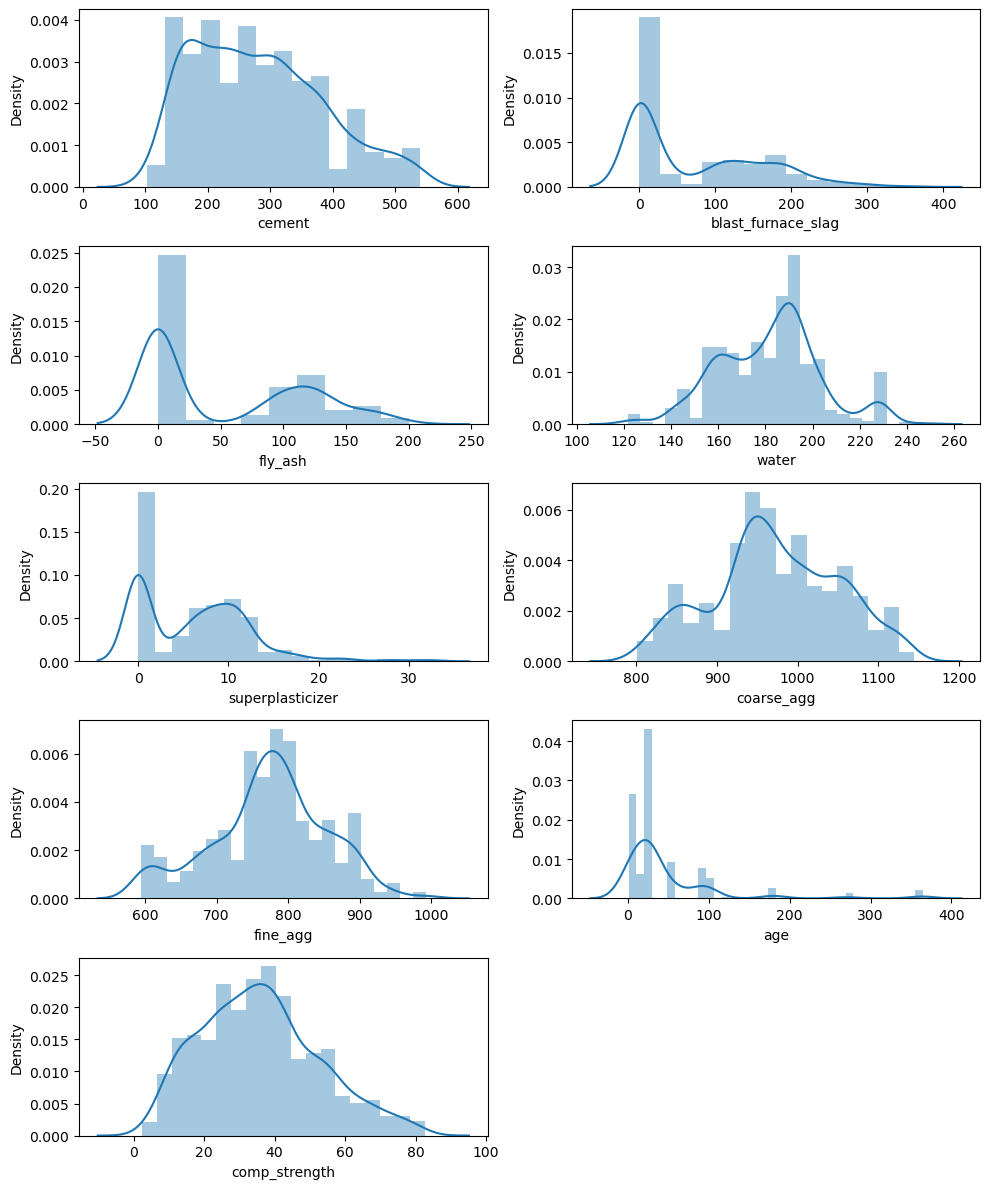

In [7]:
t = 1
plt.figure(figsize=(10,12))
for i in data.columns:
    plt.subplot(5,2,t)
    sns.distplot(data[i])
    t+=1
plt.tight_layout()
plt.show()

### Bivariate Analysis

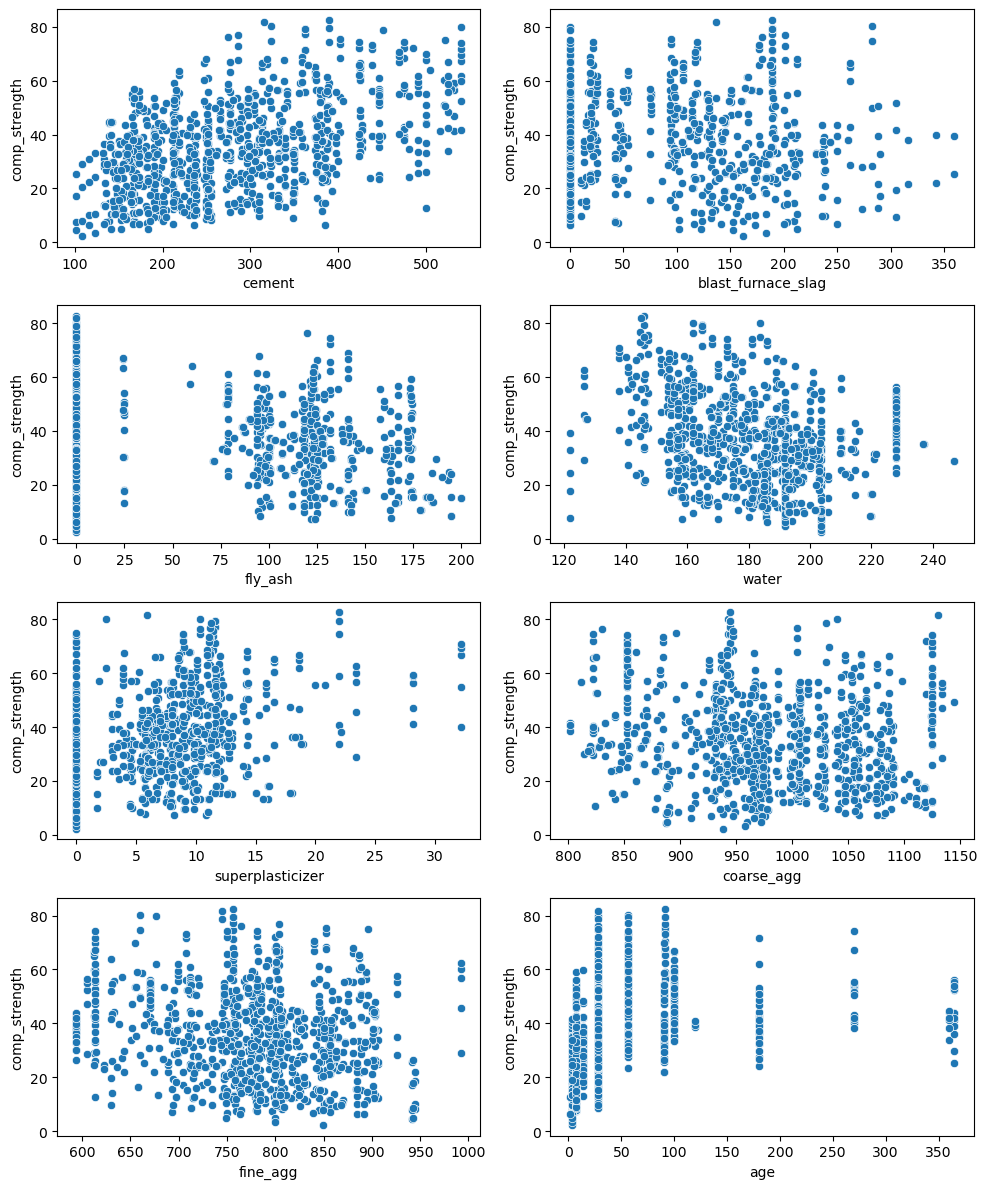

In [8]:
t = 1
plt.figure(figsize=(10,12))
for i in data.columns:
    if i != 'comp_strength':
        plt.subplot(4,2,t)
        sns.scatterplot(x=data[i],y=data['comp_strength'])
        t+=1
plt.tight_layout()
plt.show()

<Axes: >

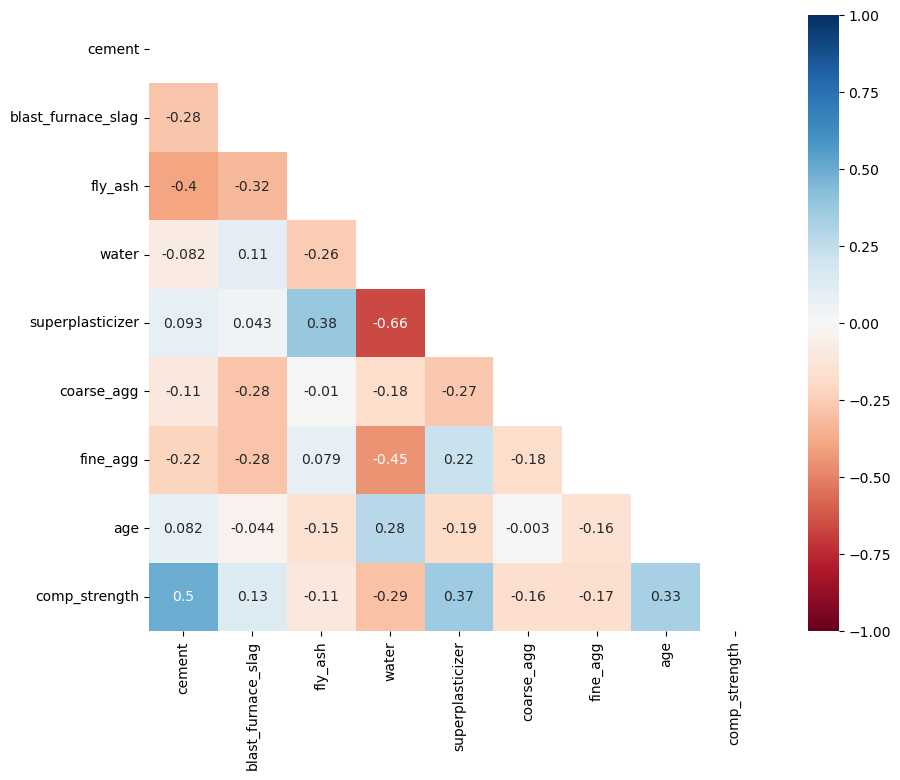

In [9]:
# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),vmax=1,vmin=-1,cmap='RdBu',annot=True,
           mask = np.triu(data.corr()))

### Treat the defects in the dataset

In [10]:
# Missing Values
data.isnull().sum()

cement                0
blast_furnace_slag    0
fly_ash               0
water                 0
superplasticizer      0
coarse_agg            0
fine_agg              0
age                   0
comp_strength         0
dtype: int64

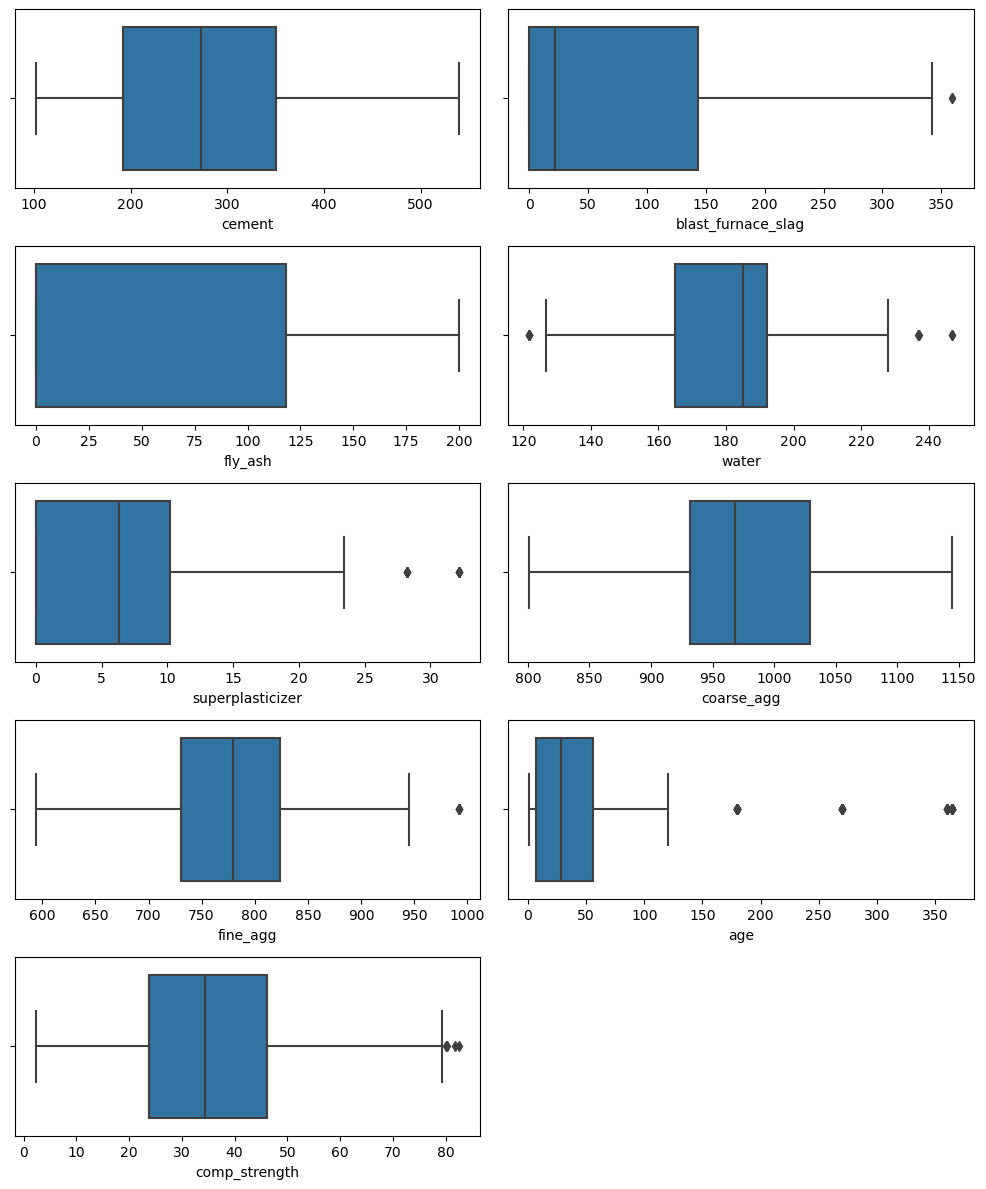

In [11]:
# Do we have Outliers?
t = 1
plt.figure(figsize=(10,12))
for i in data.columns:
    plt.subplot(5,2,t)
    sns.boxplot(x=data[i],orient='h')
    t+=1
plt.tight_layout()
plt.show()

Since we will be training a linear regression model which is highly sensitive to outliers. We will treat the extreme outliers. Just to see the effect of outliers on the model we build and compare two models one with outliers and one without outliers

In [12]:
# First we will the model with outliers present in the dataset
x = data.drop(columns=['comp_strength'])
y = data['comp_strength']

sma.OLS(y,sma.add_constant(x)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          comp_strength   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     204.3
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          6.76e-206
Time:                        10:20:25   Log-Likelihood:                -3869.0
No. Observations:                1030   AIC:                             7756.
Df Residuals:                    1021   BIC:                             7800.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -23.1638     26.588     -0.871      0.384     -75.338      29.010
cement                 0.1198      0.008     14.110      0.000       0.103       0.136
blast_furnace_slag     0.1038      0.010     10.245      0.000       0.084       0.124
fly_ash                0.0879      0.013      6.988      0.000       0.063       0.113
water                 -0.1503      0.040     -3.741      0.000      -0.229      -0.071
superplasticizer       0.2907      0.093      3.110      0.002       0.107       0.474
coarse_agg             0.0180      0.009      1.919      0.055      -0.000       0.036
fine_agg               0.0202      0.011      1.883      0.060      -0.001       0.041
age                    0.1142      0.005     21.046      0.000       0.104       0.125
==============================================================================
Omnibus:                        5.379   Durbin-Watson:                   1.281
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                5.305
Skew:                          -0.174   Prob(JB):                       0.0705
Kurtosis:                       3.045   Cond. No.                     1.06e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
# Lets remove the outliers
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)

iqr = q3-q1
ul = q3+1.5*iqr
ll = q1-1.5*iqr

data = data.loc[~((data>ul)|(data<ll)).any(axis=1)]

In [14]:
# Model without outliers present in the dataset
x = data.drop(columns=['comp_strength'])
y = data['comp_strength']

sma.OLS(y,sma.add_constant(x)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          comp_strength   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     390.0
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          2.92e-291
Time:                        10:20:26   Log-Likelihood:                -3286.5
No. Observations:                 941   AIC:                             6591.
Df Residuals:                     932   BIC:                             6635.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 49.9873     22.409      2.231      0.026       6.010      93.964
cement                 0.1020      0.007     14.655      0.000       0.088       0.116
blast_furnace_slag     0.0755      0.008      8.982      0.000       0.059       0.092
fly_ash                0.0482      0.010      4.667      0.000       0.028       0.068
water                 -0.2496      0.035     -7.161      0.000      -0.318      -0.181
superplasticizer       0.2160      0.085      2.535      0.011       0.049       0.383
coarse_agg            -0.0103      0.008     -1.311      0.190      -0.026       0.005
fine_agg              -0.0103      0.009     -1.152      0.250      -0.028       0.007
age                    0.3127      0.009     34.065      0.000       0.295       0.331
==============================================================================
Omnibus:                        8.746   Durbin-Watson:                   1.295
Prob(Omnibus):                  0.013   Jarque-Bera (JB):               10.120
Skew:                           0.147   Prob(JB):                      0.00635
Kurtosis:                       3.414   Cond. No.                     1.11e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

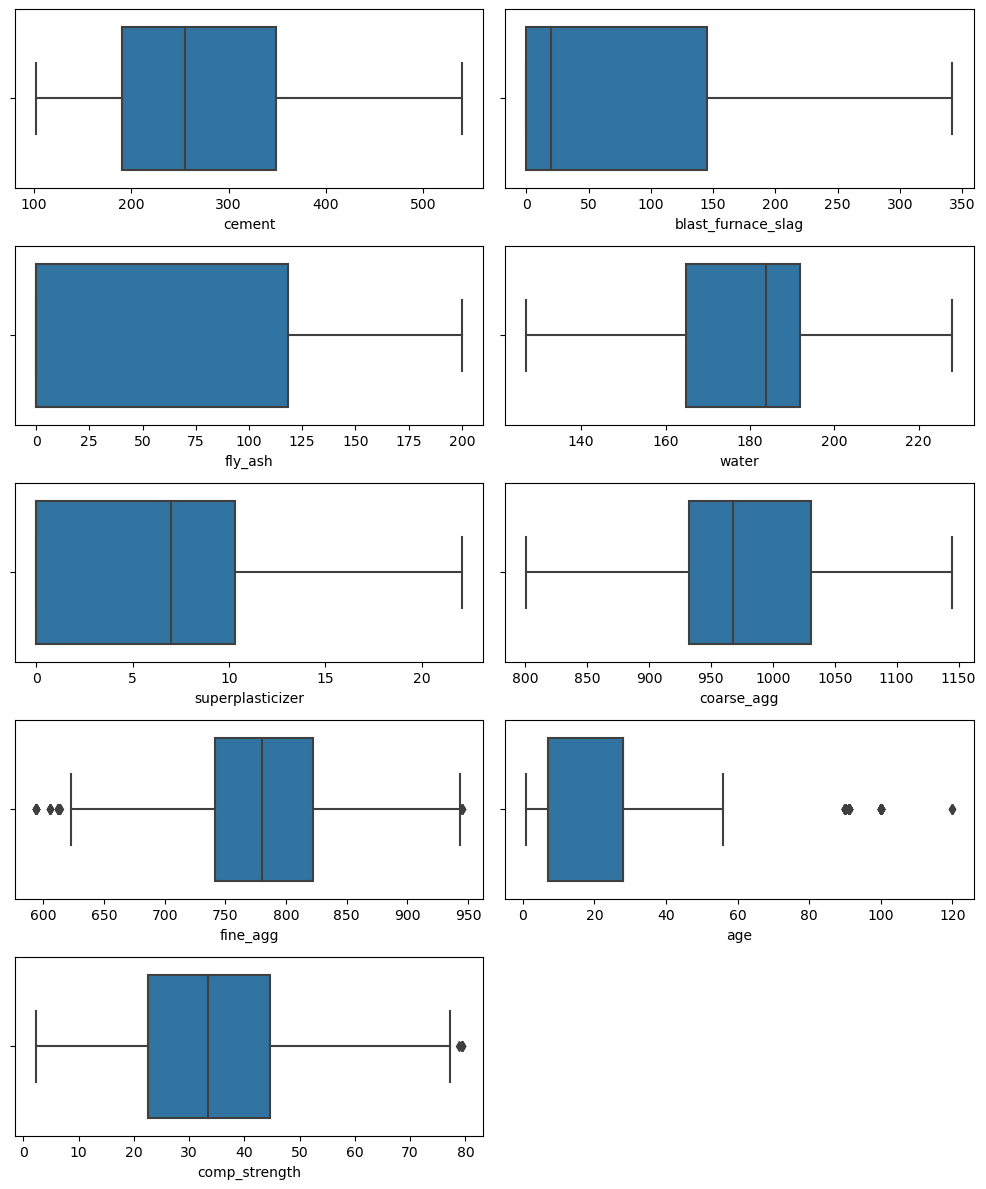

In [15]:
t = 1
plt.figure(figsize=(10,12))
for i in data.columns:
    plt.subplot(5,2,t)
    sns.boxplot(x=data[i],orient='h')
    t+=1
plt.tight_layout()
plt.show()

### Feature Engineering

In [16]:
# Feature Engineering
# Instead of taking water and cement lets take cement to water ratio

x['Cem_Wat_ratio'] = x['cement']/x['water']

x.drop(columns=['cement','water'],inplace=True)

x.head()

,blast_furnace_slag,fly_ash,superplasticizer,coarse_agg,fine_agg,age,Cem_Wat_ratio
1,0.0,0.0,2.5,1055.0,676.0,28,3.333333
5,114.0,0.0,0.0,932.0,670.0,90,1.166667
7,95.0,0.0,0.0,932.0,594.0,28,1.666667
8,114.0,0.0,0.0,932.0,670.0,28,1.166667
9,0.0,0.0,0.0,932.0,594.0,28,2.083333


In [17]:
x['coarse_fine_ratio'] = x['coarse_agg']/x['fine_agg']

x.drop(columns=['coarse_agg','fine_agg'],inplace=True)

x.head()

,blast_furnace_slag,fly_ash,superplasticizer,age,Cem_Wat_ratio,coarse_fine_ratio
1,0.0,0.0,2.5,28,3.333333,1.560651
5,114.0,0.0,0.0,90,1.166667,1.391045
7,95.0,0.0,0.0,28,1.666667,1.569024
8,114.0,0.0,0.0,28,1.166667,1.391045
9,0.0,0.0,0.0,28,2.083333,1.569024


### Building a base model

In [18]:
base_model = sma.OLS(y,sma.add_constant(x)).fit()
base_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          comp_strength   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     501.0
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          7.41e-288
Time:                        10:20:27   Log-Likelihood:                -3300.7
No. Observations:                 941   AIC:                             6615.
Df Residuals:                     934   BIC:                             6649.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -16.8579      2.179     -7.735      0.000     -21.135     -12.581
blast_furnace_slag     0.0795      0.004     19.228      0.000       0.071       0.088
fly_ash                0.0598      0.007      8.896      0.000       0.047       0.073
superplasticizer       0.2923      0.073      3.989      0.000       0.148       0.436
age                    0.3122      0.009     33.621      0.000       0.294       0.330
Cem_Wat_ratio         19.3876      0.611     31.719      0.000      18.188      20.587
coarse_fine_ratio      0.3264      1.558      0.210      0.834      -2.731       3.384
==============================================================================
Omnibus:                        7.729   Durbin-Watson:                   1.273
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                8.389
Skew:                           0.155   Prob(JB):                       0.0151
Kurtosis:                       3.343   Cond. No.                     1.17e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Before making any Business Interpretations lets check for the assumptions

In [19]:
# Assumption 1: Target Must be numeric: Met

In [20]:
# Assumption 2: There should be no multicoliniarity

# VIF

vif_list = []

for i in range(x.shape[1]):
    vif_list.append(variance_inflation_factor(x.values,i))
    
pd.DataFrame({'Feature Name':x.columns,'VIF':vif_list}).\
sort_values(by='VIF',ascending=False)

,Feature Name,VIF
5,coarse_fine_ratio,18.748741
4,Cem_Wat_ratio,13.385894
2,superplasticizer,5.190011
1,fly_ash,4.526993
0,blast_furnace_slag,2.973961
3,age,2.246780


In [21]:
# In order to deal with multicolinearity we need to remove columns one by
# one and check the scores of the model

# Model without coarse fine ration : negligible drop

x_c = sma.add_constant(x)

sma.OLS(y,x_c.drop(columns=['coarse_fine_ratio'])).fit().rsquared

0.7629229457193574

In [22]:
# Model without cement water ratio : significant drop

sma.OLS(y,x_c.drop(columns=['Cem_Wat_ratio'])).fit().rsquared

0.5075700168485489

In [23]:
# Lets drop coarge fine ratio from the model and calculate the VIF again

x.drop(columns=['coarse_fine_ratio'],inplace=True)

vif_list = []

for i in range(x.shape[1]):
    vif_list.append(variance_inflation_factor(x.values,i))
    
pd.DataFrame({'Feature Name':x.columns,'VIF':vif_list}).\
sort_values(by='VIF',ascending=False)

,Feature Name,VIF
2,superplasticizer,3.933220
4,Cem_Wat_ratio,3.117410
1,fly_ash,2.420682
3,age,2.128090
0,blast_furnace_slag,1.612342


### Model 1

In [24]:
model_1 = sma.OLS(y,sma.add_constant(x)).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          comp_strength   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     601.8
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          2.94e-289
Time:                        10:20:27   Log-Likelihood:                -3300.7
No. Observations:                 941   AIC:                             6613.
Df Residuals:                     935   BIC:                             6643.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -16.4837      1.248    -13.209      0.000     -18.933     -14.035
blast_furnace_slag     0.0796      0.004     19.587      0.000       0.072       0.088
fly_ash                0.0601      0.007      9.052      0.000       0.047       0.073
superplasticizer       0.2879      0.070      4.102      0.000       0.150       0.426
age                    0.3122      0.009     33.639      0.000       0.294       0.330
Cem_Wat_ratio         19.4152      0.597     32.540      0.000      18.244      20.586
==============================================================================
Omnibus:                        7.756   Durbin-Watson:                   1.271
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                8.407
Skew:                           0.156   Prob(JB):                       0.0149
Kurtosis:                       3.342   Cond. No.                         619.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

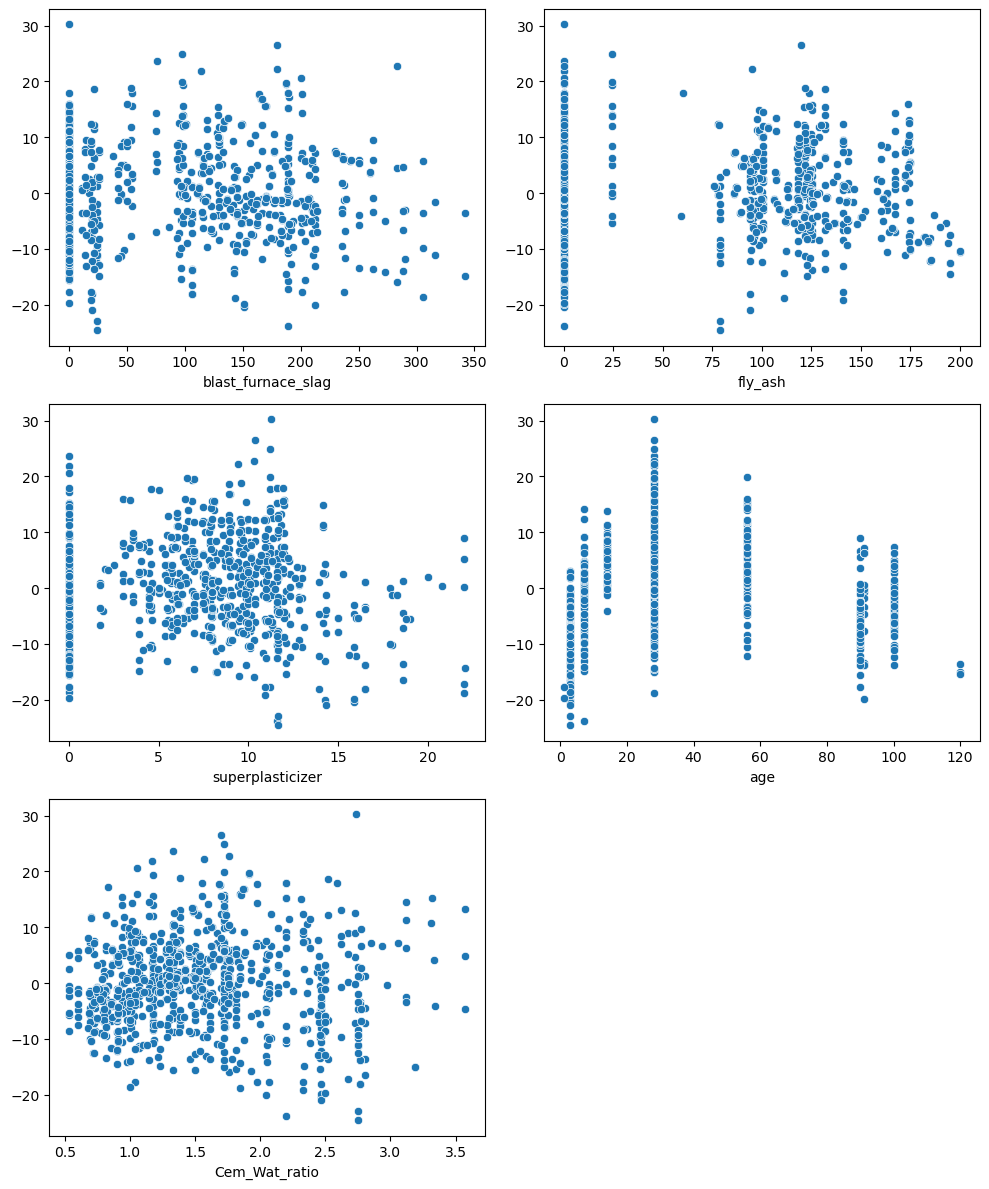

In [25]:
# Assumption 3: Linear relation among variables

# Plot residual vs ind variables
plt.figure(figsize=(10,12))
t=1
for i in x.columns:
    plt.subplot(3,2,t)
    sns.scatterplot(x=x[i],y=model_1.resid)
    t+=1
plt.tight_layout()
plt.show()

In [26]:
# Rainbow to check liniarity
# Ho: Variables are linear
# Ha: Variables are not linear

p_value = linear_rainbow(model_1)[1]

if p_value < 0.05:
    print('Reject Ho: Variables are not linear')
else:
    print('Faul to reject Ho: Variables are linear')

Faul to reject Ho: Variables are linear


In [27]:
# Assumption 4: There should be no autocorrelation

# d = 1.271

Since durbin watson statistic is less than 1.5 < d < 2.5 we can say that there is some positive autocorrelation in the dataset

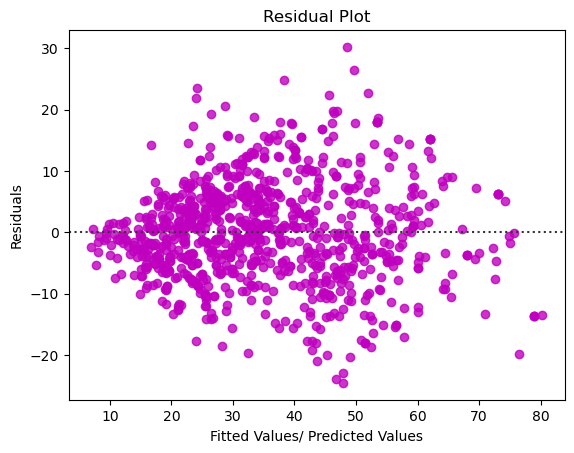

In [28]:
# Assumption 5: The residual must be homoscedastic

sns.residplot(x=model_1.fittedvalues,y=model_1.resid,color='m')
plt.xlabel('Fitted Values/ Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [29]:
# Breusch Pagan test

# Ho: The varinces are same: Homoscedastic
# Ha: The variances are not same: Hetroscedastic

p_value = sma.stats.diagnostic.het_breuschpagan(model_1.resid,
                                                model_1.model.exog)[1]


if p_value<0.05:
    print('Reject Ho: Residual are Hetroscedastic')
else:
    print('Fail to reject Ho: Residual are Homoscedastic')

Reject Ho: Residual are Hetroscedastic


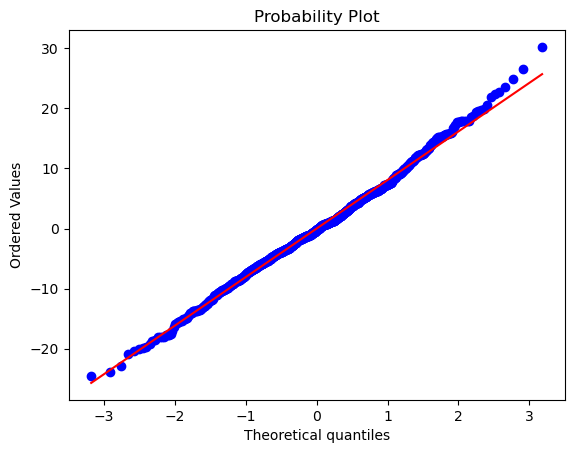

In [30]:
# Assumption 6: Residual must be normal

# qq plot

stats.probplot(model_1.resid,plot=plt)
plt.show()

In [31]:
stats.shapiro(model_1.resid)

ShapiroResult(statistic=0.9963052868843079, pvalue=0.02541407383978367)

In [32]:
# The residual are approximatly normal

## Business Interpretation

In [33]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          comp_strength   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     601.8
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          2.94e-289
Time:                        10:20:29   Log-Likelihood:                -3300.7
No. Observations:                 941   AIC:                             6613.
Df Residuals:                     935   BIC:                             6643.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -16.4837      1.248    -13.209      0.000     -18.933     -14.035
blast_furnace_slag     0.0796      0.004     19.587      0.000       0.072       0.088
fly_ash                0.0601      0.007      9.052      0.000       0.047       0.073
superplasticizer       0.2879      0.070      4.102      0.000       0.150       0.426
age                    0.3122      0.009     33.639      0.000       0.294       0.330
Cem_Wat_ratio         19.4152      0.597     32.540      0.000      18.244      20.586
==============================================================================
Omnibus:                        7.756   Durbin-Watson:                   1.271
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                8.407
Skew:                           0.156   Prob(JB):                       0.0149
Kurtosis:                       3.342   Cond. No.                         619.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1. All the features are significant features
2. The intercept being -16.4837 is absurd because -ve comp strength makes no sense.
3. One unit increase in cem/water ratio increases the strength by 19 Mpa
4. If the concrete ages by 1 day there is increase in strength by 0.3122 Mpa
5. Adding a superplacticizer by 1 unit increase the strength by 0.2879 Mpa

### Predictive Modeling

In [34]:
# Re-Fitted Model on train dataset

# lets split the data into train and test

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,
                                                 random_state=1)

In [36]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(658, 5) (283, 5) (658,) (283,)


In [37]:
model_lr = LinearRegression()
model_lr.fit(x_train,y_train)  # Training a model

LinearRegression()

In [38]:
y_pred = model_lr.predict(x_test)

In [39]:
print('R-Squared:',r2_score(y_test,y_pred))

r2 = r2_score(y_test,y_pred)
n = len(y_test)
k = x_test.shape[1]

print('Adjusted R2:',1-(((1-r2)*(n-1))/(n-k-1)))
print('MSE:',mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MAPE:',mean_absolute_percentage_error(y_test,y_pred))

R-Squared: 0.7576581307991503
Adjusted R2: 0.7532837288280159
MSE: 64.39266071824979
RMSE: 8.024503767726063
MAE: 6.1751425488916984
MAPE: 0.2459749078490164


### ML Pipeline

Step1: Data Preprocessing
1. Collection
2. Formatting
3. Labeling

Step2: Feature Extraction
1. Feature Tranformation
2. Feature Engineering
3. Feature Selection

Step3: Modeling
1. Model Building
2. Model Evaluation

Step4: Optimization
1. Prediction Evaluation
2. Model Validation
3. Model Fine Tuning

Step5: Deployment

### Deployment

In [40]:
import pickle

In [41]:
with open('lr_model.pkl','wb') as file:
    pickle.dump(model_lr,file)

In [42]:
model_lr.feature_names_in_

array(['blast_furnace_slag', 'fly_ash', 'superplasticizer', 'age',
       'Cem_Wat_ratio'], dtype=object)

In [43]:
import gradio as gr
import pickle
import warnings
warnings.filterwarnings('ignore')

In [44]:
# Load your trained model
with open('lr_model.pkl','rb') as file:
    loaded_model = pickle.load(file)

In [45]:
loaded_model.predict([[1,1,1,1,1]])[0]

3.6118454667970994

In [46]:
def pred_target(blast_slag,flyash,super_plas,age,cem_water):
    
    input_data = [[blast_slag,flyash,super_plas,age,cem_water]]
    
    pred = loaded_model.predict(input_data)
    
    return round(pred[0],2)

In [47]:
# Design the interface/ Front end of the Application

iface = gr.Interface(fn=pred_target,
                    inputs=[gr.Number(label='Blast Furnace Slag Kg/m3'),
                           gr.Number(label='Fly ash content Kg/m3'),
                           gr.Number(label='Superplasticizer Kg/m3'),
                           gr.Number(label='Age (Days)'),
                           gr.Number(label='Cement to water Ratio W/V')],
                    
                     outputs=gr.Textbox(label='Compresive Strength (MPa)'),
                    title='Akshaya Comressive Strenth Measuring Device',
                    description='This application calculates the compresive strength',
                    allow_flagging='never')

In [48]:
iface.launch(share=True)

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://d63812c2db12d2174b.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
